<a href="https://colab.research.google.com/github/etorres14/MonteCarlo-OverUnder-NBA/blob/main/Over_Under_NBA2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install/Import Dependencies

In [1]:
pip install unidecode

In [59]:
import pandas as pd
import random
import time
import sqlite3
import json
import unidecode
import matplotlib.pyplot as plt


## Obtaining list of players that have played in current NBA season

In [3]:
# The table found on this webpage contains all the players that have played in the current NBA season
# I want to grab the url and use pd.read_html to grab all the tables on the webpage
url = "https://www.basketball-reference.com/leagues/NBA_2022_totals.html"
df = pd.read_html(url, header = 0)
# df[0] contains the first table on the webpage which is the one I am looking for.
df = df[0]

In [4]:
# This line of code gets rid of rows that 
df = df[df["Player"]!="Player"]
# My table contains duplicate player names (some player have played on multiple teams this season)
# Here I am storing an array of all the unique player names into a variable called all_players
all_players = df["Player"].unique()

### Cleaning list of players

In [5]:
# This block of code cleans up the names to be used in a future function
# Created an empty list to store my cleaned player names.
usable= []

# for loop iterates through my all_players array
for player in all_players:
    #Gets rid of accents in names
    player = unidecode.unidecode(player)
    #Gets rid of "." and " ' " in names
    usable.append(player.replace(".","").replace("'",""))

In [6]:
# The following players have unique url's for the game logs page.
# This will be an issue when I run thier neames through a function later.
# So I want to remove them from my list.

usable.remove("Clint Capela")
usable.remove("Enes Freedom")
usable.remove("Frank Ntilikina")
usable.remove("Cedi Osman")
##############################
usable.remove("Bojan Bogdanovic")
usable.remove("David Johnson")
usable.remove("Jaden McDaniels")
usable.remove("Chaundee Brown Jr")
usable.remove("Jalen Green")
usable.remove("Javonte Green")
usable.remove("Jalen Johnson")
usable.remove("Keldon Johnson")
usable.remove("Keon Johnson")
usable.remove("Miles Bridges")
usable.remove("Kelan Martin")
usable.remove("Kenyon Martin Jr")
usable.remove("Patty Mills")
usable.remove("Marcus Morris")
usable.remove("Stanley Johnson")
usable.remove("Mason Jones")
usable.remove("Didi Louzada")
usable.remove("Jalen Smith")
usable.remove("Kenrich Williams")
usable.remove("Robert Williams")
usable.remove("Ziaire Williams")
usable.remove("Maxi Kleber")

In [7]:
# After removing them from my usable list, I want to create a list of tuples containing the player name and the url to thier gamelogs for 2022
players_to_add = [("Clint Capela", "https://www.basketball-reference.com/players/c/capelca01/gamelog/2022"),
                  ("Enes Freedom", "https://www.basketball-reference.com/players/w/kanteen01/gamelog/2022"),
                  ("Frank Ntilikina", "https://www.basketball-reference.com/players/n/ntilila01/gamelog/2022"),
                  ("Cedi Osman", "https://www.basketball-reference.com/players/o/osmande01/gamelog/2022"),
                  ("Bojan Bogdanovic", "https://www.basketball-reference.com/players/b/bogdabo02/gamelog/2022"), 
                  ("Jaden McDaniels","https://www.basketball-reference.com/players/m/mcdanja02/gamelog/2022"),
                  ("Chaundee Brown Jr","https://www.basketball-reference.com/players/b/brownch05/gamelog/2022"),
                  ("Jalen Green","https://www.basketball-reference.com/players/g/greenja05/gamelog/2022"),
                  ("Javonte Green", "https://www.basketball-reference.com/players/g/greenja02/gamelog/2022"), 
                  ("Jalen Johnson","https://www.basketball-reference.com/players/j/johnsja05/gamelog/2022"),
                  ("Keldon Johnson","https://www.basketball-reference.com/players/j/johnske04/gamelog/2022"),
                  ("Keon Johnson","https://www.basketball-reference.com/players/j/johnske07/gamelog/2022"),
                  ("Miles Bridges","https://www.basketball-reference.com/players/b/bridgmi02/gamelog/2022"),
                  ("Kelan Martin","https://www.basketball-reference.com/players/m/martike03/gamelog/2022"),
                  ("Kenyon Martin Jr","https://www.basketball-reference.com/players/m/martike04/gamelog/2022"),
                  ("Patty Mills","https://www.basketball-reference.com/players/m/millspa02/gamelog/2022"),
                  ("Marcus Morris","https://www.basketball-reference.com/players/m/morrima03/gamelog/2022"),
                  ("Stanley Johnson","https://www.basketball-reference.com/players/j/johnsst04/gamelog/2022"),
                  ("Jalen Smith","https://www.basketball-reference.com/players/s/smithja04/gamelog/2022"),
                  ("Kenrich Williams","https://www.basketball-reference.com/players/w/willike04/gamelog/2022"),
                  ("Robert Williams","https://www.basketball-reference.com/players/w/williro04/gamelog/2022"),
                  ("Ziaire Williams","https://www.basketball-reference.com/players/w/willizi02/gamelog/2022"),
                  ("Maxi Kleber", "https://www.basketball-reference.com/players/k/klebima01/gamelog/2022")]

## Functions used to grab player game logs from basketball-reference.com

In [8]:
# Function uses player name to grab player game logs from website and returns the data as a json string
def get_player(first_name, last_name):
    # Creates a 2 second delay to avoid issues with calling API
    time.sleep(2)
    # The url for player logs are structured in a certain way we can take advantage of.
    # Uses first 2 letters of first name, and first 5 letters of last name.
    
    # If the last name is shorter than 5 letters, we use what we have.
    if len(last_name) < 5:
        l = last_name
    # Store first 2 letters of first name, and first 5 letters of last name into variables f and l respectively.
    f = first_name[0:2]
    l = last_name[0:5]
    # generate url using variables
    url = f"https://www.basketball-reference.com/players/{l[0]}/{l}{f}01/gamelog/2022"
    
    # using pd.read_html to grab tables from webpage
    # Note the number "01" after the first two letters of the first name. 
    # Certain players have url's that contain different numbers, so I need to account for this
    try:
        player_logs = pd.read_html(url, header = 0)
    except ValueError:
        try:
            url = f"https://www.basketball-reference.com/players/{l[0]}/{l}{f}02/gamelog/2022"
            player_logs = pd.read_html(url, header = 0)
        except:
            url = f"https://www.basketball-reference.com/players/{l[0]}/{l}{f}03/gamelog/2022"
            player_logs = pd.read_html(url, header = 0)
    player_logs = player_logs[7]
    # return Jason string of game logs data
    return json.dumps(player_logs.to_dict())

In [9]:
# This function will be used to deal with players I had removed from my usable list of players.
def get_other_players(url):
    time.sleep(2)
    player_logs = pd.read_html(url, header = 0)
    player_logs = player_logs[7]
    return json.dumps(player_logs.to_dict())

## Creating Database using sqlite3 to store player game logs data

In [10]:
# establish conenction to my database
con = sqlite3.connect("nba.db")

In [11]:
# create cursor variable
cur = con.cursor()

### Creating and filling table with raw NBA player game logs data in Database

In [12]:
nba_player_table = '''CREATE TABLE raw_nba(
                                id INTEGER PRIMARY KEY AUTOINCREMENT,
                                player_name text,
                                raw_html text
                            )'''

In [13]:
# create  table in my database
cur.execute(nba_player_table)

In [14]:
# commit changes
con.commit()

In [15]:
# using for loop to itterate through my usable players list and add the player name and  game log data to my table.
for player in usable:
  # create variables for first and last name to use for my get_player function
  # split player name. 
  # [0] gives me first name. [1] gives me last name
  f = player.split(" ")[0].replace(".","")
  l = player.split(" ")[1]
  # inserts player name and raw jason string of player game log data (via get_player function) into my raw_nba table
  cur.execute("INSERT INTO raw_nba (player_name, raw_html) values (?,?)", (player, get_player(f, l)))

In [16]:
con.commit()

In [17]:
con.close()

In [18]:
con = sqlite3.connect("nba.db")
cur = con.cursor()

In [19]:
# This code block adds the remaining players and thier game log data to my table

# The players are found in the players_to_add list.
# Use for loop to iterate through list
for player in players_to_add:
  # Inserts player name and game log data (via get_other_players function) into raw_nba table.
  cur.execute("INSERT INTO raw_nba (player_name, raw_html) values (?,?)", (player[0],get_other_players(player[1])))

In [20]:
con.commit()

In [21]:
cur.execute("SELECT * from raw_nba")

In [22]:
x = cur.fetchall()

In [23]:
con.close()

### Creating and filling clean data table in database

In [33]:
#Function created to help clean data of a player's game logs
def data_cleaner(input):

    #Following lines of code gets rid of rows without game data
    input = input[input["PTS"]!="PTS"]

    input = input[input["PTS"]!="Inactive"]
    input = input[input["PTS"]!="Did Not Play"]
    input = input[input["PTS"]!="Did Not Dress"]
    input = input[input["PTS"]!="Not With Team"]

    #Following lines of code changes the following columns to numeric values
    cols =   ["PTS", "AST", "TRB", "BLK", "STL", "PF", "FG","FGA", "3P", 
                "3PA", "3P%", "FG%", "FT", "FTA", "FT%", "ORB", "DRB", "+/-"]
    input[cols] = input[cols].apply(pd.to_numeric, errors='coerce')
    return input

In [34]:
#Here I am creating a list of tuples, that include the name of the player and thier cleaned nba game logs
clean = []
for player in x:
  # unpack tuple
  a,b,c = player
  # the element c contains the json string of our player's game log data.
  # we want to turn this into a pandas dataframe and use our function to clean it.
  c = data_cleaner(pd.DataFrame(json.loads(c)))
  c = json.dumps(c.to_dict())
  clean.append((a,b,c))


In [35]:
con = sqlite3.connect('nba.db')
cur = con.cursor()

In [36]:
clean_nba = '''CREATE TABLE clean_nba(
                                id INTEGER PRIMARY KEY AUTOINCREMENT,
                                player_name text,
                                raw_html text
                            )'''

In [37]:
# creating new table in my database called clean_nba
cur.execute(clean_nba)

OperationalError: ignored

In [38]:
#iterating through my list of tuples containing the clean data and inserting it into my new table 
for player in clean:
  # inserts player name and the player game logs as json string into clean_nba table.
  cur.execute("INSERT INTO clean_nba (player_name, raw_html) values (?,?)", (player[1], player[2]))

In [39]:
con.commit()

In [40]:
con.close()

In [41]:
# Helper function that takes in a name of a player and searches the table with the cleaned data.
# The function returns a clean pandas dataframe of thier game logs.
def return_player(player):
    # establish connection to database
    con = sqlite3.connect('nba.db')
    cur = con.cursor()
    dict_to_pass = {'x':player}
    # selects rows from my clean_nba table where the player name is equal to the name we inputted.
    cur.execute('select * from clean_nba where player_name=:x',dict_to_pass)
    x = cur.fetchall()
    con.close()
    # json.loads turns the json string into a dictionary  object.
    # we then use pd.DataFrame to create pandas data frame of the players game logs and return it.
    return pd.DataFrame(json.loads(x[0][2]))


## Over / Under functions

Using the monte carlo technique, I want to generate the probabilities of a player putting up a stat higher or lower than a certain value. For example what is the probability of LeBron James scoring more than 24 points in a game? Using the player's data of the previous games this season, I create simulations of points he would score in a game based off the distribution of our data (In this case Normal Distribution). I then use the outcomes to generate my probality.


Below are some visuals to help digest this.

Text(0.5, 0, 'Points')

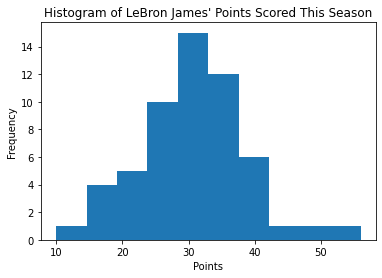

In [75]:
# A visualization of the distribution of points LeBron James has scored this season
lebron = return_player("LeBron James")

lebron.PTS.plot.hist()
plt.title("Histogram of LeBron James' Points Scored This Season")
plt.xlabel("Points")

Text(0, 0.5, 'Frequency')

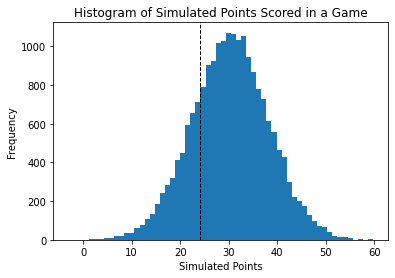

In [76]:
# Visualization of the distribution of the simulations we have created using a Guassian or Normal Distribution of his Points.
# The Line indicates the 24 points mark
mu = lebron.PTS.mean()
sigma= lebron.PTS.std()
sim_points = []
for i in range(20000):
  sim_points.append(random.gauss(mu,sigma))

plt.hist(sim_points, bins=60)
plt.axvline(24, color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram of Simulated Points Scored in a Game")
plt.xlabel("Simulated Points")
plt.ylabel("Frequency")

In [ ]:
def over_under_pts(player, value):
  # Here I am making use of my return_player function to grab the dataframe 
  # of the player game logs and storing it into the variable df.
  df = return_player(player)
  # Here I am calculating and storing the mean and standard deviation for points scored each game.
  mu = df["PTS"].mean()
  sigma = df["PTS"].std()
  # This variable will be used to keep track of certain results in our simulations.
  above = 0
  # n = the number of simulations I will produce.
  n = 20000
  for i in range(n):
    # Using the mean and standard deviation I will generate a random number from a normal distribution
    # of points per game. I will then compare this number to the value the user is trying to bet over or under on.
    # If it is larger I will increment the "above" variable by 1.
    if value < random.gauss(mu,sigma):
      above += 1
  # After 20000 simulations I calculate the percentage of times we were over.
  # This percentage represents the probability of a player scoring more than the value we inputted. 
  over_prob = round(above/n,2)
  # Calculating probality of scoring less than target value
  under_prob = round(1-over_prob,2)
  # Here I am converting the probability to Moneyline odds
  if over_prob > .50:
    odds =  - 1 * (over_prob / (1 - over_prob)) * 100
  else:
    odds = (1 -  over_prob) / over_prob  * 100
  
  print(f'Over Probabilty: {over_prob}, Over Moneyline: {round(odds)}')
  print(f'Under Probability: {under_prob}, Under Moneyline: {-round(odds)}')

In [ ]:
over_under_pts("LeBron James", 24)

Over Probabilty: 0.78, Over Moneyline: -355
Under Probability: 0.22, Under Moneyline: 355


I have seperate functions for different statistics we may be betting over/under on. I could've just used one funtion and added a paramter called "statistic" to account for the differnt statistics we may want to bet on. The reason I did not do this was to avoid errors when inputting the parameter incorrectly. 

In [ ]:
def over_under_rebounds(player, value):
  df = return_player(player)
  mu = df["TRB"].mean()
  sigma = df["TRB"].std()
  above = 0
  n = 10000
  for i in range(n):
    if value < random.gauss(mu,sigma):
      above += 1
  over_prob = round(above/n,2)
  under_prob = round(1-over_prob,2)
  if over_prob > .50:
    odds =  - 1 * (over_prob / (1 - over_prob)) * 100
  else:
    odds = (1 -  over_prob) / over_prob  * 100

  print(f'Over Probabilty: {over_prob}, Over Moneyline: {round(odds)}')
  print(f'Under Probability: {under_prob}, Under Moneyline: {-round(odds)}')

In [ ]:
def over_under_steals(player, value):
    df = return_player(player)
    mu = df["STL"].mean()
    sigma = df["STL"].std()
    above = 0
    n = 10000
    for i in range(n):
        if value < random.gauss(mu,sigma):
            above += 1
    over_prob = round(above/n,2)
    under_prob = round(1-over_prob,2)
    if over_prob > .50:
        odds =  - 1 * (over_prob / (1 - over_prob)) * 100
    else:
        odds = (1 -  over_prob) / over_prob  * 100
  
    print(f'Over Probabilty: {over_prob}, Over Moneyline: {round(odds)}')
    print(f'Under Probability: {under_prob}, Under Moneyline: {-round(odds)}')

In [ ]:
def over_under_assists(player, value):
  df = return_player(player)
  mu = df["AST"].mean()
  sigma = df["AST"].std()
  above = 0
  n = 10000
  for i in range(n):
    if value < random.gauss(mu,sigma):
      above += 1
  over_prob = round(above/n,2)
  under_prob = round(1-over_prob,2)
  if over_prob > .50:
    odds =  - 1 * (over_prob / (1 - over_prob)) * 100
  else:
    odds = (1 -  over_prob) / over_prob  * 100
  
  print(f'Over Probabilty: {over_prob}, Over Moneyline: {round(odds)}')
  print(f'Under Probability: {under_prob}, Under Moneyline: {-round(odds)}')

In [ ]:
def over_under_3pointers(player, value):
  df = return_player(player)
  # create variables for the 
  mu = df["3P"].mean()
  sigma = df["3P"].std()
  above = 0
  n = 10000
  for i in range(n):
    if value < random.gauss(mu,sigma):
      above += 1
  over_prob = round(above/n,2)
  under_prob = round(1-over_prob,2)
  if over_prob > .50:
    odds =  - 1 * (over_prob / (1 - over_prob)) * 100
  else:
    odds = (1 -  over_prob) / over_prob  * 100
  
  print(f'Over Probabilty: {over_prob}, Over Moneyline: {round(odds)}')
  print(f'Under Probability: {under_prob}, Under Moneyline: {-round(odds)}')

In [ ]:
def over_under_blocks(player, value):
  df = return_player(player)
  mu = df["BLK"].mean()
  sigma = df["BLK"].std()
  above = 0
  n = 10000
  for i in range(n):
    if value < random.gauss(mu,sigma):
      above += 1
  over_prob = round(above/n,2)
  under_prob = round(1-over_prob,2)
  if over_prob > .50:
    odds =  - 1 * (over_prob / (1 - over_prob)) * 100
  else:
    odds = (1 -  over_prob) / over_prob  * 100
  
  print(f'Over Probabilty: {over_prob}, Over Moneyline: {round(odds)}')
  print(f'Under Probability: {under_prob}, Under Moneyline: {-round(odds)}')

In [ ]:
def over_under_freethrows(player, value):
  df = return_player(player)
  mu = df["FT"].mean()
  sigma = df["FT"].std()
  above = 0
  n = 10000
  for i in range(n):
    if value < random.gauss(mu,sigma):
      above += 1
  over_prob = round(above/n,2)
  under_prob = round(1-over_prob,2)
  if over_prob > .50:
    odds =  - 1 * (over_prob / (1 - over_prob)) * 100
  else:
    odds = (1 -  over_prob) / over_prob  * 100
  
  print(f'Over Probabilty: {over_prob}, Over Moneyline: {round(odds)}')
  print(f'Under Probability: {under_prob}, Under Moneyline: {-round(odds)}')

In [ ]:
def over_under_turnovers(player, value):
  df = return_player(player)
  mu = df["TOV"].mean()
  sigma = df["TOV"].std()
  above = 0
  n = 10000
  for i in range(n):
    if value < random.gauss(mu,sigma):
      above += 1
  over_prob = round(above/n,2)
  under_prob = round(1-over_prob,2)
  if over_prob > .50:
    odds =  - 1 * (over_prob / (1 - over_prob)) * 100
  else:
    odds = (1 -  over_prob) / over_prob  * 100
  
  print(f'Over Probabilty: {over_prob}, Over Moneyline: {round(odds)}')
  print(f'Under Probability: {under_prob}, Under Moneyline: {-round(odds)}')